In [1]:
# Importacion de librerias y clases
import matplotlib.pyplot as plt
import tensorflow as tf
from EnvCoppSim import Robot
from detection import ObjectDetector
import control_utils
import network_utils

# Para inicializar, la escena en CoppeliaSim debe estar ejecutandose
robot = Robot() 
robot.reset(do_orientate=True, is_dynamic=True)
detector = ObjectDetector()
network = network_utils.create_control_network()
network.load_weights("modelo10000.h5") # modelo entrenado

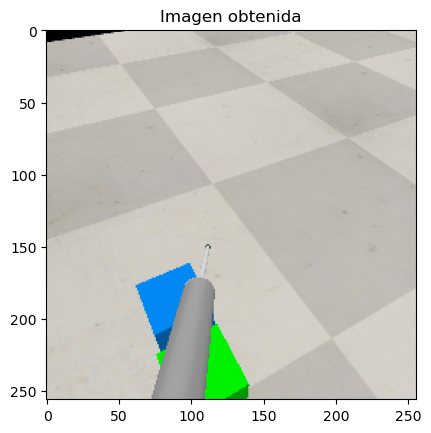

Objeto Rectángulo: (62, 162, 55, 61)


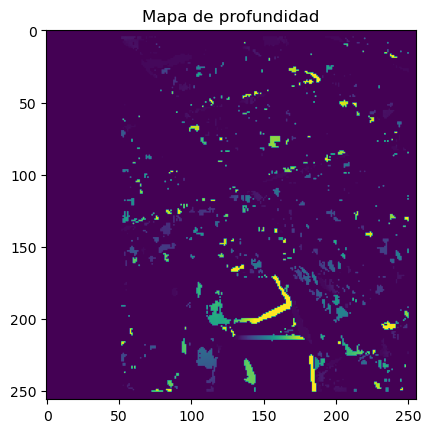

In [2]:
# Verifique la retroalimentacion visual
img, depth_map = robot.get_vision_feedback()
plt.title("Imagen obtenida")
plt.imshow(img)
plt.show()
rect = detector.detect(img)
print("Objeto Rectángulo: {}".format(rect))
plt.title("Mapa de profundidad")
plt.imshow(depth_map)
plt.show()

In [3]:
# Restablecer estadisticas por episodio
success_count = 0
total_count = 0
# Ejecute una simulacion de busqueda y aproximacion a un objetivo
episodes = 3

total_count += episodes
for i in range(episodes):
    robot.reset(is_dynamic=True, do_orientate=False)
    success = control_utils.find_and_approach(robot, detector, network)
    if success:
        success_count+=1
print(success_count / total_count)

posI: [-2.7740045e+00 -3.3573745e-04  2.9670596e+00  2.0943952e+00
  1.5697589e+00 -1.5950758e-07]
posI: [-2.6711006e+00 -3.3506844e-04  2.9670596e+00  2.0943952e+00
  1.5697576e+00 -1.7169671e-07]
posI: [-2.3743939e+00 -3.3499228e-04  2.9670596e+00  2.0943952e+00
  1.5697572e+00 -4.8869526e-07]
posI: [-2.0777164e+00 -3.3506899e-04  2.9670596e+00  2.0943952e+00
  1.5697589e+00 -3.5721402e-07]
posEnc: [-2.0777164e+00 -3.3506899e-04  2.9670596e+00  2.0943952e+00
  1.5697589e+00 -3.5721402e-07]
posI: [-1.8803549  -0.45229858  2.9670596   1.7098874   1.5040216  -0.04172788]
posEnc: [-1.8803549  -0.45229858  2.9670596   1.7098874   1.5040216  -0.04172788]
posI: [-1.7067883  -0.93046564  2.9427388   1.3248239   1.3532586  -0.07212591]
posEnc: [-1.7067883  -0.93046564  2.9427388   1.3248239   1.3532586  -0.07212591]
posI: [-3.5476822e-01 -3.3560334e-04  2.9670596e+00  2.0943952e+00
  1.5697589e+00 -1.5994031e-07]
posI: [-8.9086115e-01 -3.3506923e-04  2.9670596e+00  2.0943952e+00
  1.5697587e+